In [1]:
day = 12
import os
if os.path.exists(f"day_{day}_test.txt"):
    test = [x.strip() for x in open(f'day_{day}_test.txt', 'r')]
lines = [x.strip() for x in open(f'day_{day}_input.txt', 'r')]

(array([20]), array([0]))
deque([((20, 0), 0)])
[['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'a' ... 'a' 'a' 'a']
 ['a' 'b' 'a' ... 'a' 'a' 'a']
 ...
 ['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'c' ... 'a' 'a' 'a']]
41 161
440
[[ 22.  23.  24. ... 186. 187. 186.]
 [ 21.  22.  23. ... 185. 186. 187.]
 [ 20.  21.  22. ... 186. 187. 188.]
 ...
 [ 20.  21.  22. ... 198. 201. 200.]
 [ 21.  22.  23. ... 197. 198. 199.]
 [ 22.  23.  24. ... 196. 197. 198.]]


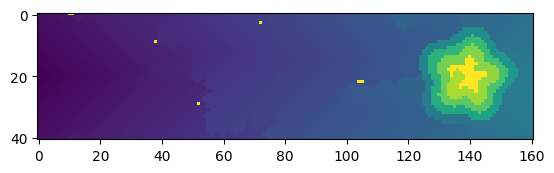

y


In [5]:
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

case = lines

ROWS = len(case)
COLS = len(case[0])

map_ = np.zeros(dtype='str',shape=(ROWS,COLS))

for i in range(ROWS):
    for j in range(COLS):
        map_[i][j] = case[i][j]

best_to_here = np.zeros(shape=map_.shape) + 500#$ map_.shape[0]*map_.shape[1]

def within_one(row,col,this):
    if this == 'S':
        return True
    if this =='z' and map_[row][col] == 'E':
        return True
    return ord(map_[row][col]) <= ord(this) + 1

itemindex = np.where(map_ == 'S')
print(itemindex)
row_S = itemindex[0][0]
col_S = itemindex[1][0]

search_next = deque()
search_next.append(((row_S,col_S),0))
path = set()

print(search_next)

max_found = 'a'

print(map_)
print(ROWS,COLS)
while search_next:
    search = search_next.popleft()
    row = search[0][0]
    col = search[0][1]
    dist = search[1]
    this = map_[row][col]
    best_to_here[row][col] = dist
    max_found = this if ord(this) > ord(max_found) else max_found
    if (row,col) in path:
        continue
    path.add((row,col))
    if this == 'E':
        print(dist)
        break
    for d in [(1,0),(0,1),(0,-1),(-1,0)]:
        row_n = row+d[0]
        col_n = col+d[1]
        if 0 <= row_n < ROWS and 0 <= col_n < COLS:
            if within_one(row_n,col_n, this):
                search_next.append(((row_n,col_n),dist+1))

print(best_to_here)
plt.imshow(best_to_here)
plt.show()
print(max_found)

In [ ]:
# Part 2

In [41]:
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

case = lines

ROWS = len(case)
COLS = len(case[0])

map_ = np.zeros(dtype='str',shape=(ROWS,COLS))

for i in range(ROWS):
    for j in range(COLS):
        map_[i][j] = case[i][j]

best_to_here = np.zeros(shape=map_.shape) + map_.shape[0]*map_.shape[1]

def within_one(row,col,this):
    if this == 'S':
        return True
    if this =='z' and map_[row][col] == 'E':
        return True
    return ord(map_[row][col]) <= ord(this) + 1

itemindex = np.where(map_ == 'a')
print(itemindex)

BEST = map_.shape[0]*map_.shape[1]

from tqdm import tqdm
for item in tqdm(range(len(itemindex[0]))):
    row_S = itemindex[0][item]
    col_S = itemindex[1][item]

    search_next = deque()
    search_next.append(((row_S,col_S),0))
    path = set()

    max_found = 'a'

    while search_next:
        search = search_next.popleft()
        row = search[0][0]
        col = search[0][1]
        dist = search[1]
        this = map_[row][col]
        best_to_here[row][col] = dist
        max_found = this if ord(this) > ord(max_found) else max_found
        if (row,col) in path:
            continue
        path.add((row,col))
        if this == 'E':
            if dist < BEST:
                BEST = dist
            break
        for d in [(1,0),(0,1),(0,-1),(-1,0)]:
            row_n = row+d[0]
            col_n = col+d[1]
            if 0 <= row_n < ROWS and 0 <= col_n < COLS:
                if within_one(row_n,col_n, this):
                    search_next.append(((row_n,col_n),dist+1))

    # print(best_to_here)
    # plt.imshow(best_to_here)
    # plt.show()
    # print(max_found)
print(BEST)

(array([ 0,  0,  0, ..., 40, 40, 40]), array([  0,   8,   9, ..., 158, 159, 160]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1841/1841 [00:05<00:00, 330.73it/s]

439
